
# Nearest Neighbors Classification


Heart Disease UCI 분석

https://www.kaggle.com/ronitf/heart-disease-uci



In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

#파일 읽기
heart = pd.read_csv('./data/heart.csv')

#데이터 살펴보기
print("heart=", heart)  #전체 출력
print("heart.head()=", heart.head()) #상단행 5개
print("heartf.tail()=", heart.tail()) #하단행 5개

print("heart.dtypes = ", heart.dtypes)    #데이터 타입들
print("heart.index = ", heart.index)      #행 레이블
print("heart.columns = ", heart.columns)  #열 레이블

print("heart.AHD size = ", heart.groupby('AHD').size())

#  Unnamed: 0  열 삭제 (원본에서 삭제)
heart.drop('Unnamed: 0', axis=1, inplace=True)  

print("heart.columns = ", heart.columns)  #열 레이블

#AHD 변경, No=0, Yes=1 
print(heart.AHD)
heart.AHD  = (heart.AHD == 'Yes').astype('int32')


#통계요약
print("heart.describe()=", heart.describe())

#Sorting :
heart_s = heart.sort_values(by='Age', ascending=False)  #나이 역순으로  정렬
display(heart_s)


heart=      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
5             6   56    1    nontypical     120   236    0        0    178   
6             7   62    0  asymptomatic     140   268    0        2    160   
7             8   57    0  asymptomatic     120   354    0        0    163   
8             9   63    1  asymptomatic     130   254    0        2    147   
9            10   53    1  asymptomatic     140   203    1        2    155   
10           11   57    1  asymptomatic     140   192    0        0    148   
11           12   56    0    nontypical     140   294    

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
161,77,1,asymptomatic,125,304,0,2,162,1,0.0,1,3.0,normal,1
257,76,0,nonanginal,140,197,0,1,116,0,1.1,2,0.0,normal,0
233,74,0,nontypical,120,269,0,2,121,1,0.2,1,1.0,normal,0
103,71,0,nonanginal,110,265,1,2,130,0,0.0,1,1.0,normal,0
42,71,0,nontypical,160,302,0,0,162,0,0.4,1,2.0,normal,0
273,71,0,asymptomatic,112,149,0,0,125,0,1.6,2,0.0,normal,0
155,70,1,asymptomatic,130,322,0,2,109,0,2.4,2,3.0,normal,1
136,70,1,asymptomatic,145,174,0,0,125,1,2.6,3,0.0,reversable,1
170,70,1,nonanginal,160,269,0,0,112,1,2.9,2,1.0,reversable,1
258,70,1,nontypical,156,245,0,2,143,0,0.0,1,0.0,normal,0


heart Sum of Null Values 



1    201
0     96
Name: Sex, dtype: int64

sc[1]= 201
sc[0]= 96
Total : 297
Male Count    : 201
Female Count  : 96


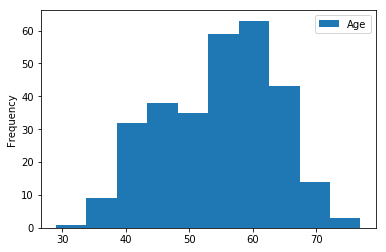

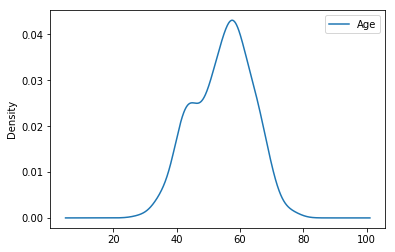

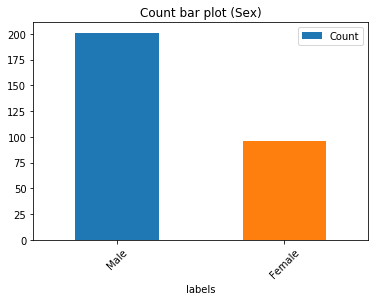

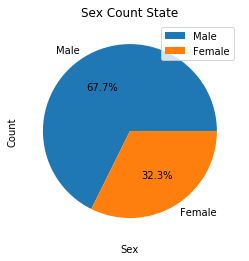

Text(0.5, 1.0, '0.29047626246129743')

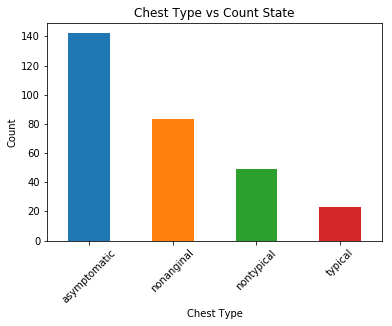

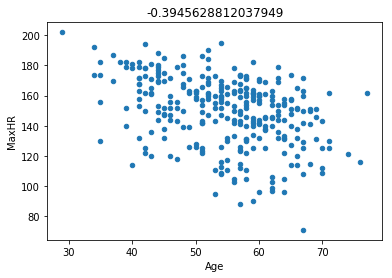

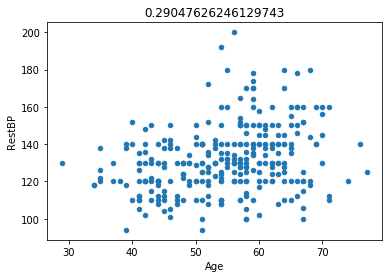

In [143]:
# 성별 변환 

# 누락된 데이터의 합 확인
print('heart Sum of Null Values \n')
heart.isnull().sum()

#누락된 값 있는 행삭제
heart.dropna(how='any', inplace=True) 



# 상관계수 테이블만들기


#나이의 histogram(분포 확인)
heart.plot.hist(y='Age')
heart.plot.density(y='Age')


#성별에 대한 개수로 bar plot, 비율계산하여 pie plot
sc = heart.Sex.value_counts()  # 각 값에 따른 개수
display(sc)
print('sc[1]=', sc[1])
print('sc[0]=', sc[0])


total_count=len(heart.Sex)
male_count=len(heart[heart.Sex==1])
female_count=len(heart[heart.Sex==0])
print('Total :',total_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

## 성별 비율, Percentage ratios 백분율
m = (male_count/ total_count) * 100
f = (female_count/ total_count) * 100

df =  pd.DataFrame({'labels' : ['Male', 'Female'],
                    'Count': [male_count, female_count],
                   'Percentage': [m, f]})
df.plot.bar(y='Count', x='labels', title='Count bar plot (Sex)', rot=45)
df.plot.pie(y='Percentage', title='Percentage pie plot (Sex)', autopct='%1.1f%%', labels=['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count State')
plt.show()

#ChestPain 에 대한 카운트 bar chart
cnt = heart.ChestPain.value_counts()
cnt.plot.bar(rot=45)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')

#나이와  최대심박수, 나이와 혈압과의 관계 확인
# 상관계수, scatter plot

heart.plot.scatter(x='Age', y='MaxHR')

cor1 = heart.Age.corr(heart.MaxHR)
plt.title(cor1)

heart.plot.scatter(x='Age', y='RestBP')
cor1 = heart.Age.corr(heart.RestBP)
plt.title(cor1)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013DA9240>,
      dtype=object)

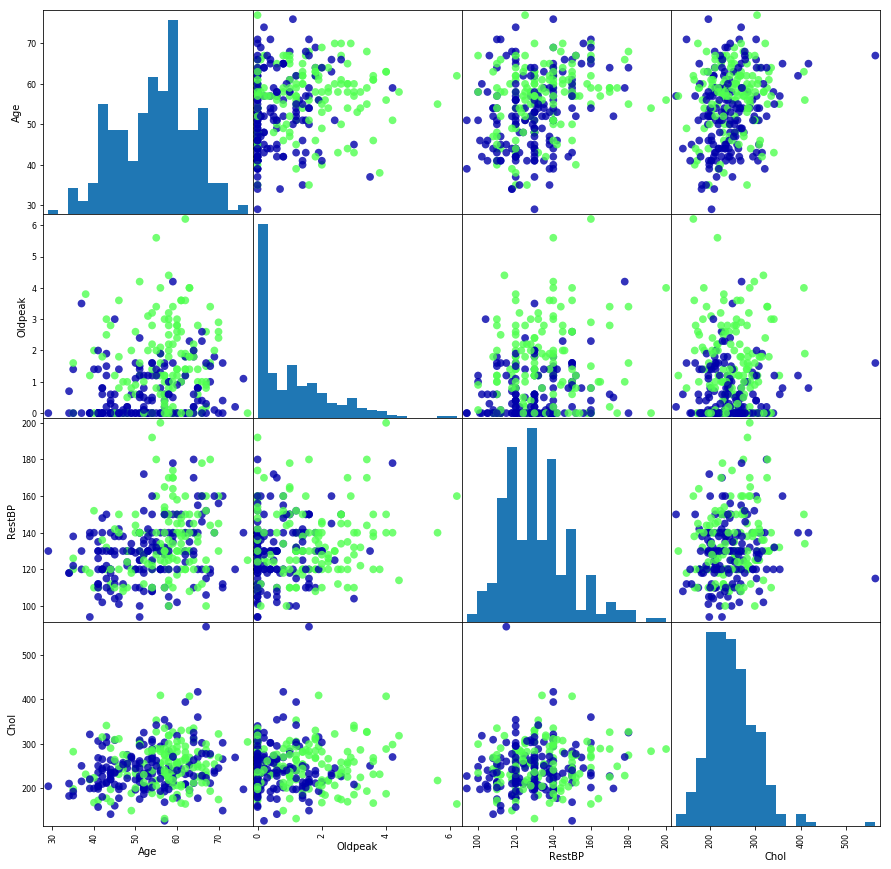

In [140]:
col=['Age','Oldpeak','RestBP','Chol']
dataX = heart[col]
datay= heart.AHD
pd.plotting.scatter_matrix(dataX, c=datay, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

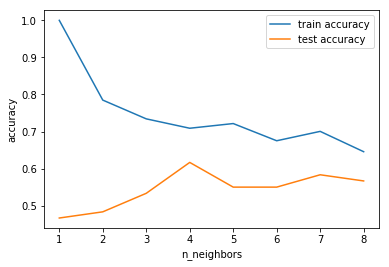

In [141]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test=train_test_split(dataX,datay,test_size=0.2,  stratify=datay, random_state=42)


training_accuracy = []
test_accuracy = []
# 1 에서 9 까지 n_neighbors 를 적용
neighbors_settings = range(1, 9)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()